In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Set data paths

In [2]:
# Explore data sources from .csv files, merge them and save them
brg_path = Path("data/2_brg/brg_raw.csv")
pkeg_path = Path("data/3_pkeg/pkeg_raw.csv")
old_brg_path = Path("data/4_brg_old/brg_old.csv")

DATA_COLS = ["source", "id", "lon", "lat", "date", "gwl_cm"]

# 1. Read data

### BRGM new data

In [3]:
brg_df = pd.read_csv(brg_path)

In [4]:
#See the values of the main variables
brg_df.head()

,id,lon,lat,date,gwl_max,gwl_min,gwl_rata,smm_max,smm_min,smm_rata
0,BRG_140301_01,102.099167,1.519444,15-Oct-18,NaN,NaN,-0.144,77.0,0.0,32.866
1,BRG_140301_01,102.099167,1.519444,16-Oct-18,-0.132,-0.215,-0.179,75.1,31.7,34.625
2,BRG_140301_01,102.099167,1.519444,17-Oct-18,-0.171,-0.241,-0.206,33.3,30.9,32.169
3,BRG_140301_01,102.099167,1.519444,18-Oct-18,-0.141,-0.241,-0.181,70.8,31.5,35.549
4,BRG_140301_01,102.099167,1.519444,19-Oct-18,-0.200,-0.263,-0.231,32.5,30.5,31.555


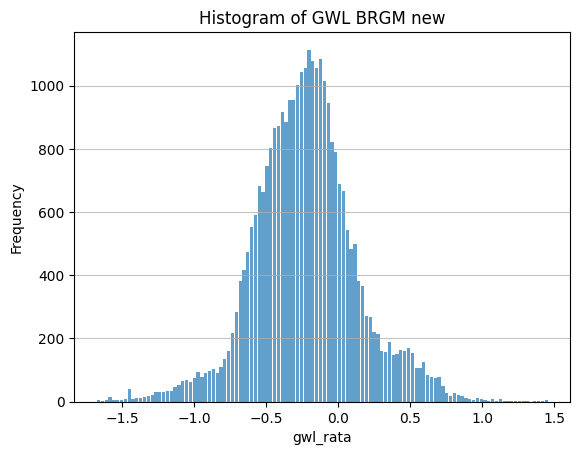

In [5]:

#Plot an histogram of the variable gwl_rata
# Choose the column for which you want to plot the histogram
column_name = 'gwl_rata'

# Plotting the histogram
plt.hist(brg_df[column_name], bins='auto', alpha=0.7, rwidth=0.85)
plt.title('Histogram of GWL BRGM new'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [6]:
brg_cols_rename = {
    "gwl_rata" : "gwl_cm",
}

# rename columns
brg_df.rename(columns=brg_cols_rename, inplace=True)

# Convert date column to datetime
brg_df["date"] = pd.to_datetime(brg_df["date"])

# multiply gwl_cm by 100 to convert it to cm
brg_df["gwl_cm"] = brg_df["gwl_cm"] * 100

# set a new column for source
brg_df["source"] = "brg"

brg_df = brg_df[DATA_COLS]
brg_df.head()

/tmp/ipykernel_438/2616001532.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brg_df["date"] = pd.to_datetime(brg_df["date"])


,source,id,lon,lat,date,gwl_cm
0,brg,BRG_140301_01,102.099167,1.519444,2018-10-15,-14.4
1,brg,BRG_140301_01,102.099167,1.519444,2018-10-16,-17.9
2,brg,BRG_140301_01,102.099167,1.519444,2018-10-17,-20.6
3,brg,BRG_140301_01,102.099167,1.519444,2018-10-18,-18.1
4,brg,BRG_140301_01,102.099167,1.519444,2018-10-19,-23.1


### PKEG data

In [7]:
# Read pkeg's data
pkeg_df = pd.read_csv(pkeg_path, sep=";")

In [8]:
pkeg_cols_rename = {
    "date(dd/mm/yyyy)" : "date",
    "gwl(cm)" : "gwl_cm",
    "coor_y(dd)" : "lat",
    "coor_x(dd)" : "lon",
}

# Rename columns
pkeg_df.rename(columns=pkeg_cols_rename, inplace=True)

# combine "kode_perusahaan"	and "kode_titik" to create a unique id
pkeg_df.loc[:, "id"] = pkeg_df["kode_perusahaan"] + "_" + pkeg_df["kode_titik"]

# Convert date column to datetime
pkeg_df.loc[:, "date"] = pd.to_datetime(pkeg_df["date"], dayfirst=True)

# set a new column for source
pkeg_df["source"] = "pkeg"

# Only select columns that are needed
pkeg_df = pkeg_df[DATA_COLS]
pkeg_df.head()

,source,id,lon,lat,date,gwl_cm
0,pkeg,121_APC_A21,96.451939,3.809687,2020-11-14 00:00:00,-10.0
1,pkeg,121_APC_A21,96.451939,3.809687,2020-11-26 00:00:00,-12.0
2,pkeg,121_APC_A21,96.451939,3.809687,2020-12-02 00:00:00,-30.0
3,pkeg,121_APC_A21,96.451939,3.809687,2020-12-16 00:00:00,-60.0
4,pkeg,121_APC_A21,96.451939,3.809687,2021-07-12 00:00:00,-25.0


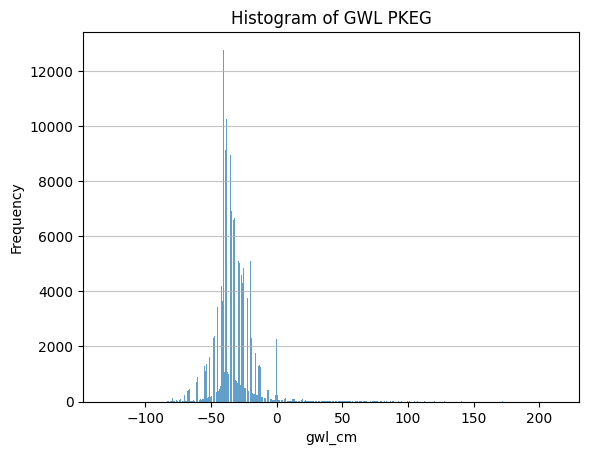

In [10]:
#Plot an histogram of the variable gwl_cm
# Choose the column for which you want to plot the histogram
column_name = 'gwl_cm'

# Plotting the histogram
plt.hist(pkeg_df[column_name], bins='auto', alpha=0.7, rwidth=0.85)
plt.title('Histogram of GWL PKEG'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Previous BRG data

In [11]:
old_brg_df = pd.read_csv(old_brg_path)

In [12]:
old_brg_df.loc[:, "source"] = "old_brg"
old_brg_df.loc[:, "date"] = pd.to_datetime(old_brg_df["date"], dayfirst=True)

# Multiply gwl_cm by 100 to convert it to cm
old_brg_df["gwl_cm"] = old_brg_df["gwl_cm"] * 100
old_brg_df = old_brg_df[DATA_COLS]
old_brg_df.head()

,source,id,lon,lat,date,gwl_cm
0,old_brg,BRG_150503_01,103.928286,-1.545325,2019-07-06 00:00:00,-304.0
1,old_brg,BRG_150503_01,103.928286,-1.545325,2019-07-07 00:00:00,-304.0
2,old_brg,BRG_150503_01,103.928286,-1.545325,2019-07-08 00:00:00,-304.0
3,old_brg,BRG_150503_01,103.928286,-1.545325,2019-07-09 00:00:00,-304.0
4,old_brg,BRG_150503_01,103.928286,-1.545325,2019-07-10 00:00:00,-304.0


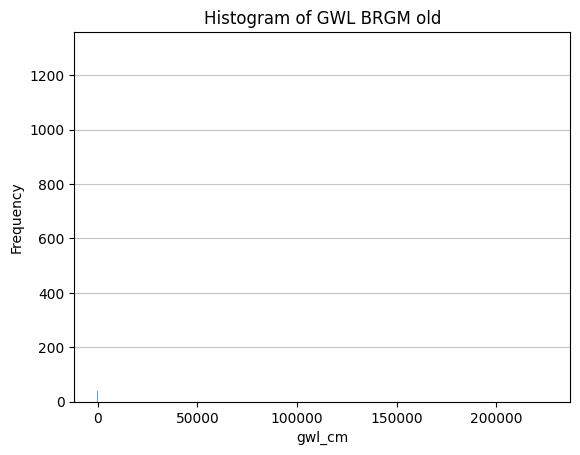

In [13]:
#Plot an histogram of the variable gwl_cm
# Choose the column for which you want to plot the histogram
column_name = 'gwl_cm'

# Plotting the histogram
plt.hist(old_brg_df[column_name], bins='auto', alpha=0.7, rwidth=0.85)
plt.title('Histogram of GWL BRGM old'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

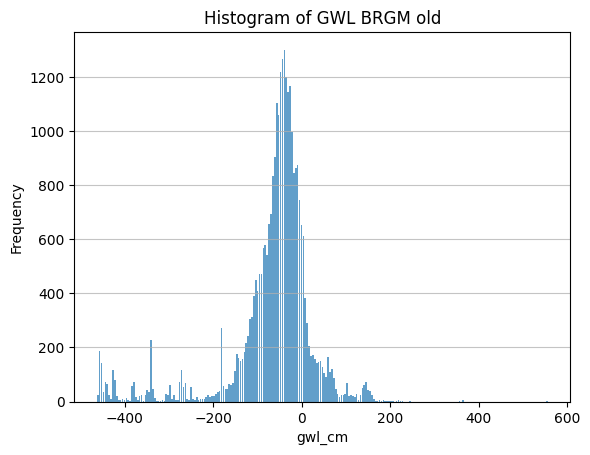

In [14]:
#In the previous dataset there are some odd values above 5 meters that must be caused by malfunction, I manually remove any value above 600 cm in the dataset
# Filter rows based on the condition
condition = old_brg_df['gwl_cm'] <= 600
filtered_old_brg_df = old_brg_df[condition]

#Plot an histogram of the variable gwl_cm
# Choose the column for which you want to plot the histogram
column_name = 'gwl_cm'

# Plotting the histogram
plt.hist(filtered_old_brg_df[column_name], bins='auto', alpha=0.7, rwidth=0.85)
plt.title('Histogram of GWL BRGM old'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


### Concatenate all data sources

In [15]:
# Merge the two dataframes
df = pd.concat([brg_df, pkeg_df, filtered_old_brg_df], ignore_index=True)
df.head()

,source,id,lon,lat,date,gwl_cm
0,brg,BRG_140301_01,102.099167,1.519444,2018-10-15 00:00:00,-14.4
1,brg,BRG_140301_01,102.099167,1.519444,2018-10-16 00:00:00,-17.9
2,brg,BRG_140301_01,102.099167,1.519444,2018-10-17 00:00:00,-20.6
3,brg,BRG_140301_01,102.099167,1.519444,2018-10-18 00:00:00,-18.1
4,brg,BRG_140301_01,102.099167,1.519444,2018-10-19 00:00:00,-23.1


In [16]:
# save the dataframe as csv
df.to_csv("data/field_data_all_with_old.csv", index=False)

In [17]:
# Remove duplicate dates for each id using the mean value
# Group by 'id' and 'date' and calculate the mean value for 'gwl_cm' while keeping other columns

print("Before removing duplicates", len(df))

agg_dict = {'source':'first','lon':'first','lat':'first','gwl_cm':'mean'}
df = df.groupby(['id','date']).agg(agg_dict).reset_index()

print("After removing duplicates", len(df))

Before removing duplicates 306049
After removing duplicates 298744


In [18]:
# Below I will remove the duplicated coordinates IDS and keep the first one
# get unique lon-lat pairs
unique = df[["id", "lon", "lat"]].drop_duplicates()

# Get duplicated lon-lat pairs
duplicated = unique[unique.duplicated(subset=["lon", "lat"], keep=False)]

duplicated = duplicated.drop_duplicates(subset=["lon", "lat"], keep="first")

# Get the duplicated ids
duplicated_ids = duplicated["id"].unique()

# # get dataframe without duplicated ids

df = df[~df["id"].isin(duplicated_ids)]

df.to_csv("data/field_data_unique_coords.csv", index=False)
df

,id,date,source,lon,lat,gwl_cm
0,02_AHL_SBG-B076,2020-11-05,pkeg,117.007750,3.937760,-37.0
1,02_AHL_SBG-B076,2020-11-17,pkeg,117.007750,3.937760,-39.0
2,02_AHL_SBG-B076,2020-12-05,pkeg,117.007750,3.937760,-39.0
3,02_AHL_SBG-B076,2020-12-16,pkeg,117.007750,3.937760,-35.0
4,02_AHL_SBG-B076,2021-01-02,pkeg,117.007750,3.937760,-34.0
...,...,...,...,...,...,...
298739,kecil1,2019-10-26,old_brg,113.805611,-2.856089,-302.1
298740,kecil1,2019-10-27,old_brg,113.805611,-2.856089,-302.3
298741,kecil1,2019-10-31,old_brg,113.805611,-2.856089,-302.3
298742,kecil1,2019-11-02,old_brg,113.805611,-2.856089,-302.3


In [17]:
# get unique coordinates for each station
stations = df[["id", "source", "lon", "lat"]].drop_duplicates()


# Convert to GeoDataFrame
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(stations.lon, stations.lat)]
stations_gdf = GeoDataFrame(stations, geometry=geometry)
stations_gdf.crs = "EPSG:4326"
stations_gdf.to_file("data/0_shp/unique_stations_no_repeated.shp")